### MAX VOTING , AVERAGING & WEIGHTED VOTING 
### ( Regression Practical )

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns 
from sklearn.datasets import make_moons


In [17]:
x,y = make_moons(n_samples=1000, noise=0.2)

In [18]:
x

array([[-0.63927359,  0.67560988],
       [ 1.5918383 ,  0.01452728],
       [ 1.76546978,  0.00884385],
       ...,
       [ 1.99352047,  0.33973485],
       [-0.1943942 ,  0.83858126],
       [ 0.5058728 ,  1.24714545]], shape=(1000, 2))

In [19]:
df = {'x1': x[:,0], 'x2': x[:,1],'y':y}

In [20]:
dataset = pd.DataFrame(df)
dataset.head(5)

,x1,x2,y
0,-0.639274,0.675610,0
1,1.591838,0.014527,1
2,1.765470,0.008844,1
3,1.743270,-0.030023,1
4,-1.060771,0.447653,0


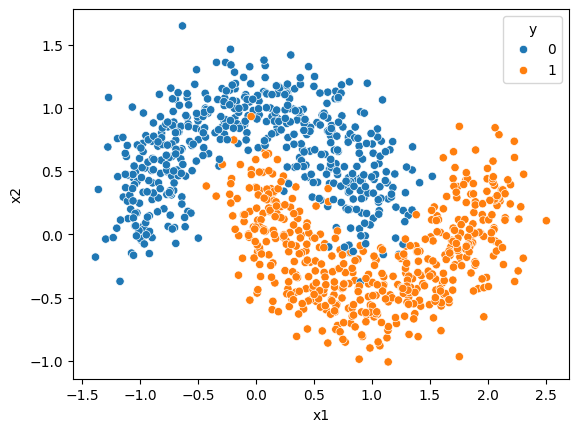

In [21]:
sns.scatterplot(x= 'x1', y='x2', data = dataset, hue='y')
plt.show()

In [22]:
x_a = dataset.iloc[:,:-1]
y_a = dataset['y']

In [23]:
# split the data into training and testing

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# Splitting data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(x_a, y_a , test_size=0.2, random_state=42)

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

#### Decision tree model

In [33]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt.score(X_train, y_train)*100 , dt.score(X_test,y_test)*100

(100.0, 95.5)

#### SVM model

In [34]:
sv = SVC()
sv.fit(X_train, y_train)
sv.score(X_train, y_train)*100 , dt.score(X_test,y_test)*100

(97.125, 95.5)

#### GaussianNB model

In [35]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb.score(X_train, y_train)*100 , dt.score(X_test,y_test)*100

(87.875, 95.5)

In [36]:
# we can improve accuracy by Ensemble learning 

In [37]:
from sklearn.ensemble import VotingClassifier

In [38]:
li = [('dt1',  DecisionTreeClassifier()), ('sv1', SVC()),('gnb1', GaussianNB())]

In [39]:
vc = VotingClassifier(li)
vc.fit(X_train, y_train)

VotingClassifier(estimators=[('dt1', DecisionTreeClassifier()), ('sv1', SVC()),
                             ('gnb1', GaussianNB())])

In [41]:
vc.score(X_train, y_train)*100, vc.score(X_test,y_test)*100

(97.625, 97.0)

In [45]:
prd ={'dt': dt.predict(X_test), 'svm' : sv.predict(X_test), 'gnb' : gnb.predict(X_test), 'vc' : vc.predict(X_test)}

In [46]:
pd.DataFrame(prd)

,dt,svm,gnb,vc
0,1,1,1,1
1,0,0,0,0
2,1,1,1,1
3,1,0,0,0
4,0,0,0,0
...,...,...,...,...
195,1,1,0,1
196,0,0,0,0
197,0,0,0,0
198,0,0,1,0
